In [89]:
import json
from payload_pb2 import SingleLocationData, LocationMessageWrapper, DensityMap, WarnMessage
import gzip
import random
import math
import statistics
import matplotlib.pyplot as plt
import numpy as np
from google.protobuf.json_format import MessageToJson
import matplotlib.patches as mpatches

def random_single():
    MAXINT = 2147483648
    payload = SingleLocationData()
    payload.deviceId = random.randint(0, MAXINT)
    payload.timestamp = random.randint(0, MAXINT)
    payload.zoneId = random.randint(0, 60)
    payload.hemisphere = (random.randint(0, 1) == 0)
    payload.northing = random.randint(0, 20000000)
    payload.easting = random.randint(0, 700000)
    payload.bearing = random.randint(0, 360)
    payload.speed = random.randint(0, 150)
    payload.accuracy = random.random() * 100.0
    return payload
    
single_proto = random_single()

wrapper_proto_single = LocationMessageWrapper()
wrapper_proto_single.single.MergeFrom(single_proto)

density_map = DensityMap()
density_map.senderDeviceId = 123456
density_map.data.extend([random_single(), random_single(), random_single(), random_single(), random_single()])

wrapper_proto_multi = LocationMessageWrapper()
wrapper_proto_multi.map.MergeFrom(density_map)

warn_message = WarnMessage()
warn_message.message = "Test WarnMessage!"
warn_message.validUntil = 1613224171
warn_message.latitude = 48.1640524
warn_message.longitude = 11.5773456

wrapper_proto_warn = LocationMessageWrapper()
wrapper_proto_warn.message.MergeFrom(warn_message)



<ipython-input-90-72d13704efc4>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation='vertical')


<BarContainer object of 1 artists>

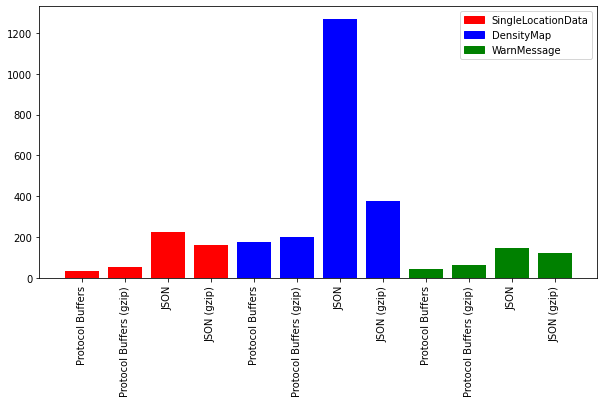

In [90]:
def test_sizes(proto):
    len_proto = len(proto.SerializeToString())
    len_json = len(MessageToJson(proto).encode('utf-8'))
    len_proto_gz = len(gzip.compress(proto.SerializeToString()))
    len_json_gz = len(gzip.compress(MessageToJson(proto).encode('utf-8')))
    
    return (len_proto, len_proto_gz, len_json, len_json_gz)

sizes = [
    test_sizes(wrapper_proto_single),
    test_sizes(wrapper_proto_multi),
    test_sizes(wrapper_proto_warn)
]

labels = np.tile(["Protocol Buffers", "Protocol Buffers (gzip)", "JSON", "JSON (gzip)"], 3)
x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(10,5))
ax.legend(handles=[
    mpatches.Patch(color='red', label='SingleLocationData'),
    mpatches.Patch(color='blue', label='DensityMap'),
    mpatches.Patch(color='green', label='WarnMessage')
])
ax.set_xticklabels(labels, rotation='vertical')
ax.set_xticks(x)

ax.bar(0, sizes[0][0], 0.8, color="red")
ax.bar(1, sizes[0][1], 0.8, color="red")
ax.bar(2, sizes[0][2], 0.8, color="red")
ax.bar(3, sizes[0][3], 0.8, color="red")

ax.bar(4, sizes[1][0], 0.8, color="blue")
ax.bar(5, sizes[1][1], 0.8, color="blue")
ax.bar(6, sizes[1][2], 0.8, color="blue")
ax.bar(7, sizes[1][3], 0.8, color="blue")

ax.bar(8, sizes[2][0], 0.8, color="green")
ax.bar(9, sizes[2][1], 0.8, color="green")
ax.bar(10, sizes[2][2], 0.8, color="green")
ax.bar(11, sizes[2][3], 0.8, color="green")
    

In [92]:
print(MessageToJson(wrapper_proto_single))

{
  "single": {
    "deviceId": 3283127,
    "timestamp": "612889822",
    "zoneId": 47,
    "hemisphere": true,
    "northing": 16132025,
    "easting": 250115,
    "bearing": 36,
    "speed": 15,
    "accuracy": 9.520454
  }
}
